# 1. Build an object detection model using pytorch

- 1. load csv file
- 2. split csv:slpit the train to train and valid in the ratio of 0.85:0.15
- 3. Plot image
- 4. create dataset
- 1. Create custom database
- 2. Create Dataloader
- 3. Create Model

1.load csv file

In [52]:
import pandas as pd
from pandas import DataFrame as df
df= pd.read_csv("/home/xin/Homework Week5/Homework Week10_project2/Cow_stall_number/Train.csv")
df_test= pd.read_csv("/home/xin/Homework Week5/Homework Week10_project2/Cow_stall_number/Test.csv")
df.fillna(0, inplace=True)
df_test.fillna(0, inplace=True)

In [53]:
df.head()

imageFilename  box_position_1  box_position_2  box_position_3  \
0   GH030066_4679.png           287.0           116.0            25.0   
1  GH020058_19383.png           275.0            58.0            23.0   
2   GH030061_1269.png           306.0            74.0            26.0   
3  GH020058_17235.png             0.0             0.0             0.0   
4  GH020058_18319.png           288.0            55.0            23.0   

   box_position_4  class_names  
0            23.0           29  
1            24.0           44  
2            25.0           13  
3             0.0            0  
4            23.0           42

In [54]:

#transfer the float to int
df['box_position_1'] = df['box_position_1'].astype(int)
df['box_position_2'] = df['box_position_2'].astype(int)
df['box_position_3'] = df['box_position_3'].astype(int)
df['box_position_4'] = df['box_position_4'].astype(int)
df_test['box_position_1'] = df_test['box_position_1'].astype(int)
df_test['box_position_2'] = df_test['box_position_2'].astype(int)
df_test['box_position_3'] = df_test['box_position_3'].astype(int)
df_test['box_position_4'] = df_test['box_position_4'].astype(int)

In [55]:
df_test.head()

imageFilename  box_position_1  box_position_2  box_position_3  \
0  GH030061_12040.png             172              81              25   
1   GH030072_2783.png             289              94              23   
2     GH010059_45.png               0               0               0   
3   GH030072_4929.png             288              94              23   
4  GH020072_31411.png               0               0               0   

   box_position_4  class_names  
0              24           28  
1              21           42  
2               0            0  
3              23           46  
4               0            0

In [56]:
df.dtypes, df_test.dtypes

(imageFilename     object
 box_position_1     int64
 box_position_2     int64
 box_position_3     int64
 box_position_4     int64
 class_names        int64
 dtype: object,
 imageFilename     object
 box_position_1     int64
 box_position_2     int64
 box_position_3     int64
 box_position_4     int64
 class_names        int64
 dtype: object)

In [57]:
#check the null value
df.isnull().sum()



imageFilename     0
box_position_1    0
box_position_2    0
box_position_3    0
box_position_4    0
class_names       0
dtype: int64

类别的分类情况

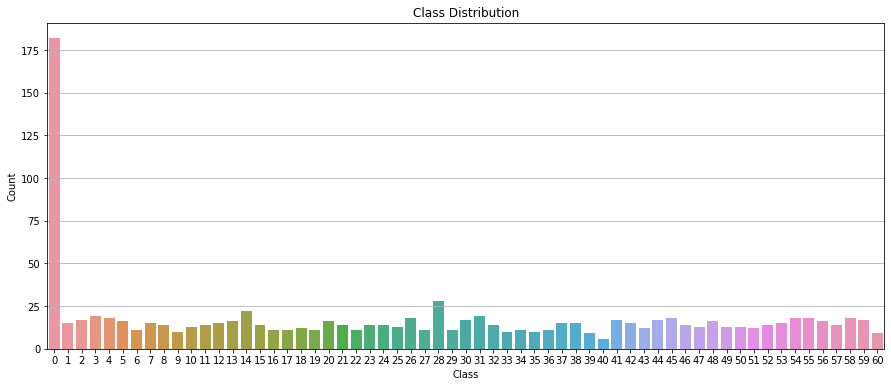

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns



def plot_category(df):
    class_counts = df['class_names'].value_counts().sort_index()


    classes = list(range(0, 61))


    complete_class_counts = pd.DataFrame(index=classes, columns=['count']).fillna(0)

    for cls in class_counts.index:
        complete_class_counts.at[cls, 'count'] = class_counts[cls]

    plt.figure(figsize=(15, 6))
    sns.barplot(x=complete_class_counts.index, y=complete_class_counts['count'])
    plt.title('Class Distribution')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(range(0, 61)) 
    plt.grid(axis='y')
    plt.show()

plot_category(df)


In the train and test CSV files, it contains the image name, stall number box location, and its number label.

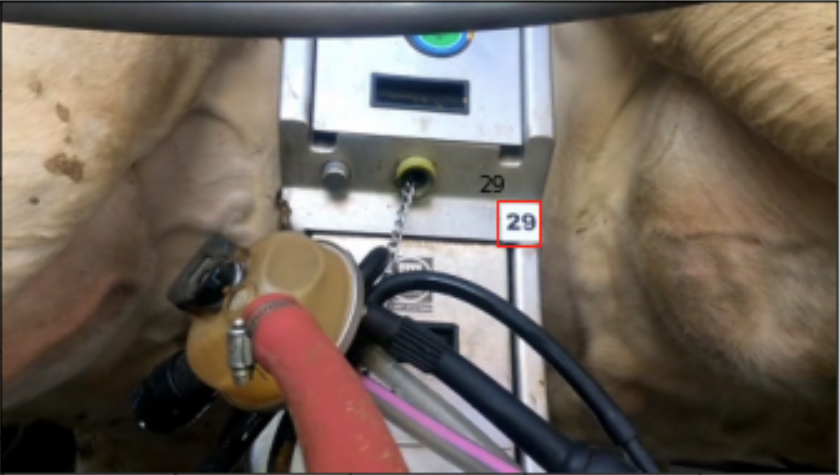

In [59]:
from PIL import Image
image=Image.open("/home/xin/Homework Week5/Homework Week10_project2/Cow_stall_number/example.png")
image.show()

2.split csv:slpit the train to train and valid in the ratio of 0.85:0.15

In [60]:
from sklearn.model_selection import train_test_split
import os

train_df, val_df = train_test_split(df, test_size=0.15, random_state=42, stratify=df['class_names'])


def get_image_size(filename):
    with Image.open(filename) as img:
        return img.size
    
def update_size(df, path_image):
    # 初始化存储尺寸的列表
    widths = []
    heights = []

    for file in df['imageFilename']:
        file_path = os.path.join(path_image, file)

        try:
            with Image.open(file_path) as img:
                width, height = img.size
        except FileNotFoundError:
            # 如果文件不存在，则设为 None
            width, height = None, None

        widths.append(width)
        heights.append(height)

    df['width'] = widths
    df['height'] = heights
    return df


def format_data(df, path_image):
    formatted_df = update_size(df, path_image)
    data = {
        "xmin": formatted_df["box_position_1"],
        "ymin": formatted_df["box_position_2"],
        "xmax": formatted_df["box_position_3"]+formatted_df["box_position_1"],
        "ymax": formatted_df["box_position_4"]+formatted_df["box_position_2"],
        "class": formatted_df["class_names"],
        "file": path_image + "/"+formatted_df["imageFilename"],
        "width": formatted_df["width"],
        "height": formatted_df["height"],
    }
    return pd.DataFrame(data)

path_image = "/home/xin/Homework Week5/Homework Week10_project2/Stall_num_images/Stall_num_images"


train_data = format_data(train_df, path_image)
val_data = format_data(val_df, path_image)
test_data = format_data(df_test, path_image)

train_data.head(), val_data.head() , test_data.head() 

/home/xin/miniconda3/envs/pytorch_nn/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/xin/miniconda3/envs/pytorch_nn/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(     xmin  ymin  xmax  ymax  class  \
 288   193    78   216   100     31   
 444     0     0     0     0      0   
 323   262    57   286    79     40   
 650   275    52   298    74      3   
 203   292    50   318    72     24   
 
                                                   file  width  height  
 288  /home/xin/Homework Week5/Homework Week10_proje...    480     270  
 444  /home/xin/Homework Week5/Homework Week10_proje...    480     270  
 323  /home/xin/Homework Week5/Homework Week10_proje...    480     270  
 650  /home/xin/Homework Week5/Homework Week10_proje...    480     270  
 203  /home/xin/Homework Week5/Homework Week10_proje...    480     270  ,
       xmin  ymin  xmax  ymax  class  \
 592      0     0     0     0      0   
 1001   276   118   300   139     47   
 370    324    69   351    94      3   
 847    279    57   302    81     44   
 177    288    54   313    79      2   
 
                                                    file  width  height  
 592   /h

3.Plot image

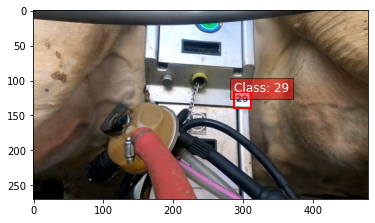

In [61]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

example_image_path = '/home/xin/Homework Week5/Homework Week10_project2/Stall_num_images/Stall_num_images/GH030066_4679.png'  # 替换为实际路径
example_bbox = [287,116,25,	23]  
example_class = 29  


img = Image.open(example_image_path)
plt.imshow(img)

rect = patches.Rectangle((example_bbox[0], example_bbox[1]), example_bbox[2], example_bbox[3], 
                         linewidth=2, edgecolor='r', facecolor='none')

plt.gca().add_patch(rect)
plt.text(example_bbox[0], example_bbox[1], f'Class: {example_class}', color='white', fontsize=12, 
         bbox=dict(facecolor='red', alpha=0.5))

plt.show()

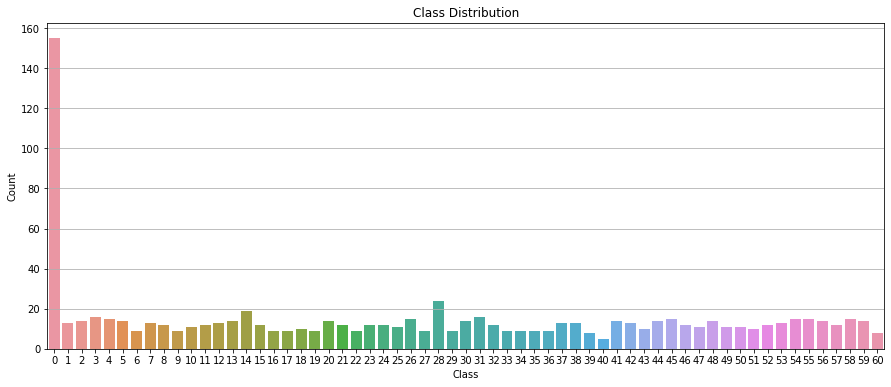

In [62]:
plot_category(train_df)

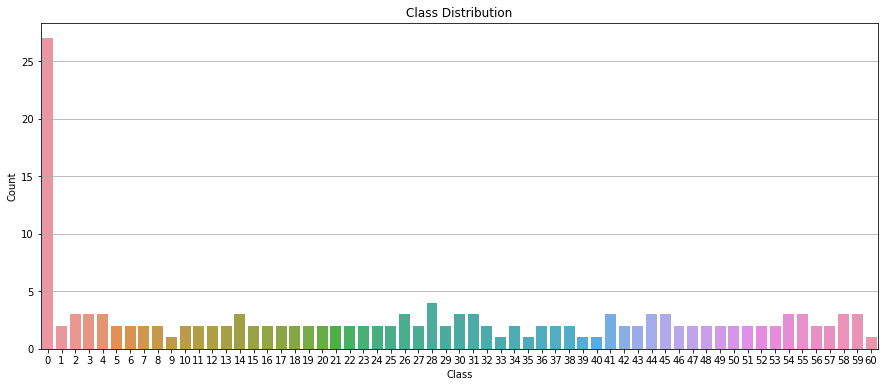

In [63]:
plot_category(val_df)

In [64]:
print("test:",len(test_data),"train:",len(train_data),"val:",len(val_data), "train/(train+val):",len(train_data)/(len(val_data)+len(train_data)))


test: 261 train: 885 val: 157 train/(train+val): 0.8493282149712092


In [65]:
train_data = train_data.reset_index(drop=True)
val_data = val_data.reset_index(drop=True)
train_data

xmin  ymin  xmax  ymax  class  \
0     193    78   216   100     31   
1       0     0     0     0      0   
2     262    57   286    79     40   
3     275    52   298    74      3   
4     292    50   318    72     24   
..    ...   ...   ...   ...    ...   
880   274    56   297    79     48   
881   288    94   313   116     26   
882   284   118   308   140     14   
883     0     0     0     0      0   
884   286    96   309   117      5   

                                                  file  width  height  
0    /home/xin/Homework Week5/Homework Week10_proje...    480     270  
1    /home/xin/Homework Week5/Homework Week10_proje...    480     270  
2    /home/xin/Homework Week5/Homework Week10_proje...    480     270  
3    /home/xin/Homework Week5/Homework Week10_proje...    480     270  
4    /home/xin/Homework Week5/Homework Week10_proje...    480     270  
..                                                 ...    ...     ...  
880  /home/xin/Homework Week5/Homework Week10_proje...    480     270  
881  /home/xin/Homework Week5/Homework Week10_proje...    480     270  
882  /home/xin/Homework Week5/Homework Week10_proje...    480     270  
883  /home/xin/Homework Week5/Homework Week10_proje...    480     270  
884  /home/xin/Homework Week5/Homework Week10_proje...    480     270  

[885 rows x 8 columns]

In [66]:
data=train_data['file'].unique()
data=train_data.iloc[:, 5].unique()
data[0]

'/home/xin/Homework Week5/Homework Week10_project2/Stall_num_images/Stall_num_images/GH010064_10272.png'

In [67]:
len(train_data.iloc[:, 4].unique()), train_data.iloc[0, 5],train_data.iloc[0]

(61,
 '/home/xin/Homework Week5/Homework Week10_project2/Stall_num_images/Stall_num_images/GH010064_10272.png',
 xmin                                                    193
 ymin                                                     78
 xmax                                                    216
 ymax                                                    100
 class                                                    31
 file      /home/xin/Homework Week5/Homework Week10_proje...
 width                                                   480
 height                                                  270
 Name: 0, dtype: object)

4.create dataset

In [68]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms

class Traindata(Dataset):
    def __init__(self, dataframe, transform=None):
        """
        Args:
            dataframe (DataFrame): 包含图像路径和标签的 DataFrame。
            transform (callable, optional): 应用于图像的可选转换。
        """
        self.dataframe = dataframe.fillna(0)
        self.to_tensor = transforms.ToTensor()
        self.image_ids = dataframe.iloc[:, 5].unique()
        # self.transform = transform

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx:int):

        #get current row
        data_row = self.dataframe.iloc[idx]

        #image
        img_name = data_row['file']
        image = Image.open(img_name).convert("RGB")
        image = self.to_tensor(image)


        #bbox,label,area,iscrowd
        if data_row[['xmin', 'ymin', 'xmax', 'ymax']].eq(0).any():
            # 如果有 NaN 值，使用默认值
            bbox = torch.zeros((0, 4), dtype=torch.int32)
            labels = torch.zeros((0,), dtype=torch.int64)
            area = torch.zeros((0,), dtype=torch.int32)
            iscrowd = torch.zeros((0,), dtype=torch.int32)
        else:
            # 否则，使用实际的边界框和标签
            xmin, ymin, xmax, ymax = data_row['xmin'], data_row['ymin'], data_row['xmax'], data_row['ymax']
            bbox = torch.tensor([[xmin, ymin, xmax, ymax]])
            label = data_row['class']
            labels = torch.tensor([label], dtype=torch.int64)
            area = torch.tensor([(xmax - xmin) * (ymax - ymin)], dtype=torch.int32)
            iscrowd = torch.zeros((1,), dtype=torch.int32)

        #target contains bbox,labels,image_id,area,iscrowd
        target = {
            'boxes': bbox,
            'labels': labels,
            'image_id': torch.tensor([idx]),
            'area': area,
            'iscrowd': iscrowd
        }

        #get current image id
        image_ids = self.image_ids[idx]
        
        # assert isinstance(target, dict), "target must be a dictionary"
        
        # if not isinstance(target, dict):
        #     print(f"Error at idx {idx}: target is not a dict, target={target}")
    
        # if self.transform:
        #     sample['image'] = self.transform(sample['image'])

        return image, target, image_ids

train_dataset = Traindata(dataframe=train_data, transform=None)
val_dataset = Traindata(dataframe=val_data, transform=None)
test_dataset = Traindata(dataframe=test_data, transform=None)

In [69]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

def show_image_with_boxes_and_labels(dataset, idx):
    # 从数据集获取图像和目标
    image, target, image_id = dataset[idx]

    # 将张量图像转换为PIL图像以便显示
    img = transforms.ToPILImage()(image).convert("RGB")

    # 显示图像
    plt.imshow(img)

    # 绘制边界框和标签
    for i, box in enumerate(target['boxes']):
        xmin, ymin, xmax, ymax = box
        rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)

        # 在边界框旁边添加标签
        label = target['labels'][i].item()  # 假设标签是整数
        plt.text(xmax+10, ymin, str(label), color='white', fontsize=12, backgroundcolor='red')

    plt.show()

In [70]:
train_dataset[1]

(tensor([[[0.9725, 0.9490, 0.9255,  ..., 0.9451, 0.9490, 0.9490],
          [0.9608, 0.9373, 0.9255,  ..., 0.9490, 0.9569, 0.9569],
          [0.9373, 0.9255, 0.9216,  ..., 0.9647, 0.9725, 0.9725],
          ...,
          [0.0941, 0.0941, 0.0941,  ..., 0.0196, 0.0275, 0.0314],
          [0.0941, 0.0941, 0.0941,  ..., 0.0000, 0.0000, 0.0118],
          [0.0941, 0.0941, 0.0941,  ..., 0.0000, 0.0000, 0.0000]],
 
         [[0.8941, 0.8706, 0.8471,  ..., 0.9961, 0.9922, 0.9922],
          [0.8824, 0.8627, 0.8471,  ..., 0.9922, 0.9961, 0.9961],
          [0.8627, 0.8471, 0.8431,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.0784, 0.0784, 0.0784,  ..., 0.0471, 0.0549, 0.0588],
          [0.0784, 0.0784, 0.0784,  ..., 0.0000, 0.0157, 0.0353],
          [0.0784, 0.0784, 0.0784,  ..., 0.0157, 0.0196, 0.0118]],
 
         [[0.8196, 0.8000, 0.7765,  ..., 1.0000, 1.0000, 1.0000],
          [0.8118, 0.7882, 0.7765,  ..., 1.0000, 1.0000, 1.0000],
          [0.7882, 0.7765, 0.7725,  ...,

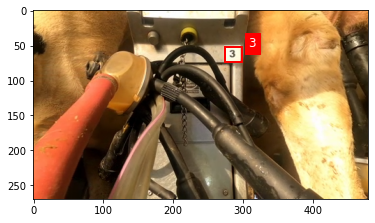

In [71]:
index_to_show = 3  
show_image_with_boxes_and_labels(train_dataset, index_to_show)

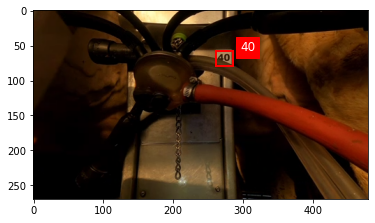

In [72]:
index_to_show = 2  
show_image_with_boxes_and_labels(train_dataset, index_to_show)

In [73]:
test_dataset[3]

(tensor([[[0.8784, 0.9020, 0.9098,  ..., 0.6039, 0.5882, 0.6118],
          [0.9020, 0.9137, 0.9255,  ..., 0.6157, 0.6078, 0.6078],
          [0.9373, 0.9373, 0.9569,  ..., 0.6078, 0.6078, 0.5961],
          ...,
          [0.4784, 0.4824, 0.4667,  ..., 0.0118, 0.0118, 0.0157],
          [0.5255, 0.4745, 0.4784,  ..., 0.0078, 0.0118, 0.0118],
          [0.4941, 0.4588, 0.4941,  ..., 0.0078, 0.0118, 0.0118]],
 
         [[0.8235, 0.8431, 0.8549,  ..., 0.4980, 0.4863, 0.5059],
          [0.8431, 0.8588, 0.8667,  ..., 0.5137, 0.5020, 0.5020],
          [0.8824, 0.8824, 0.8980,  ..., 0.5098, 0.5020, 0.4902],
          ...,
          [0.4235, 0.4275, 0.4078,  ..., 0.0039, 0.0039, 0.0078],
          [0.4706, 0.4196, 0.4235,  ..., 0.0000, 0.0039, 0.0039],
          [0.4392, 0.4078, 0.4392,  ..., 0.0000, 0.0039, 0.0039]],
 
         [[0.7882, 0.8118, 0.8196,  ..., 0.3725, 0.3608, 0.3804],
          [0.8118, 0.8235, 0.8353,  ..., 0.3882, 0.3765, 0.3765],
          [0.8471, 0.8471, 0.8667,  ...,

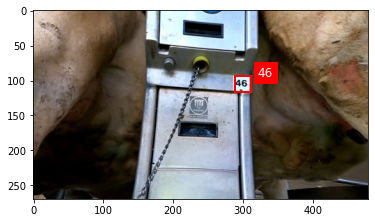

In [74]:
index_to_show = 3  
show_image_with_boxes_and_labels(test_dataset, index_to_show)

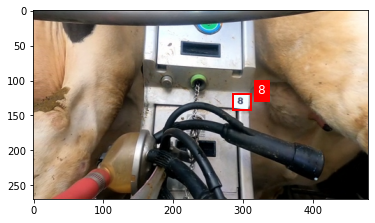

In [75]:
index_to_show = 5
show_image_with_boxes_and_labels(test_dataset, index_to_show)

In [76]:
val_dataset[3]

(tensor([[[0.6196, 0.6157, 0.6157,  ..., 1.0000, 1.0000, 1.0000],
          [0.6196, 0.6157, 0.6157,  ..., 1.0000, 1.0000, 1.0000],
          [0.6196, 0.6157, 0.6078,  ..., 1.0000, 1.0000, 1.0000],
          ...,
          [0.0706, 0.0706, 0.0706,  ..., 0.2235, 0.2235, 0.2275],
          [0.0588, 0.0588, 0.0588,  ..., 0.2235, 0.2275, 0.2275],
          [0.0549, 0.0549, 0.0549,  ..., 0.2235, 0.2235, 0.2275]],
 
         [[0.3412, 0.3412, 0.3451,  ..., 0.8863, 0.8745, 0.8902],
          [0.3412, 0.3412, 0.3451,  ..., 0.8824, 0.8824, 0.8824],
          [0.3412, 0.3412, 0.3373,  ..., 0.8706, 0.8824, 0.8706],
          ...,
          [0.0510, 0.0510, 0.0510,  ..., 0.1765, 0.1765, 0.1804],
          [0.0392, 0.0392, 0.0392,  ..., 0.1765, 0.1804, 0.1804],
          [0.0353, 0.0353, 0.0353,  ..., 0.1765, 0.1765, 0.1804]],
 
         [[0.1765, 0.1765, 0.1765,  ..., 0.5294, 0.5216, 0.5373],
          [0.1804, 0.1804, 0.1804,  ..., 0.5255, 0.5294, 0.5294],
          [0.1843, 0.1843, 0.1765,  ...,

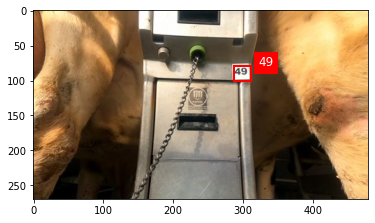

In [77]:
index_to_show = 5
show_image_with_boxes_and_labels(val_dataset, index_to_show)

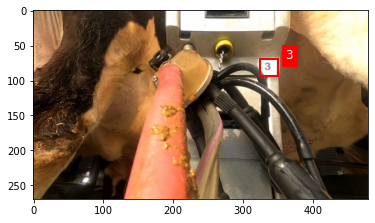

In [78]:
index_to_show = 2
show_image_with_boxes_and_labels(val_dataset, index_to_show)

In [79]:
import torch.nn.functional as F

def custom_collate_fn(batch):
    images, targets, image_ids = zip(*batch)
    
    if not images:
        raise RuntimeError('The list of images is empty.')

    # Remove empty placeholder targets
    max_size = tuple(max(sizes) for sizes in zip(*[image.shape for image in images]))

    # Now, pad the images to the max size
    images_padded = [F.pad(image, (0, max_size[2] - image.size(2), 0, max_size[1] - image.size(1))) for image in images]

    # Stack images into a single tensor
    images_tensor = torch.stack(images_padded)
    return images_tensor, targets, image_ids


In [80]:
#define data loader
train_loader = DataLoader(dataset=train_dataset, batch_size=16, shuffle=True,collate_fn=custom_collate_fn)
val_loader = DataLoader(dataset=val_dataset, batch_size=16, shuffle=True,  collate_fn=custom_collate_fn)
test_loader = DataLoader(dataset=test_dataset, batch_size=16, shuffle=True, collate_fn=custom_collate_fn)

In [81]:
from torchvision import transforms
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image


transform = transforms.Compose([
   
    transforms.ToTensor()
])

def load_image_and_boxes(batch_index_to_display, train_loader):

    for i, (images, targets, image_ids) in enumerate(train_loader):
        if i == batch_index_to_display:
      
            for j in range(len(images)):
                img = transforms.ToPILImage()(images[j]).convert("RGB")
                plt.imshow(img)

            
                for k, box in enumerate(targets[j]['boxes']):
                    xmin, ymin, xmax, ymax = box
                    rect = patches.Rectangle((xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none')
                    plt.gca().add_patch(rect)

         
                    label = targets[j]['labels'][k].item()
                    plt.text(xmax+10, ymin, str(label), color='white', fontsize=12, backgroundcolor='red')

                plt.show()

            break  

In [82]:
next(iter(train_loader))

(tensor([[[[0.8863, 0.8784, 0.9137,  ..., 0.8627, 0.8706, 0.8824],
           [0.9529, 0.9059, 0.9255,  ..., 0.9216, 0.9451, 0.9647],
           [0.9882, 0.9255, 0.9216,  ..., 0.9765, 0.9882, 1.0000],
           ...,
           [0.5294, 0.5412, 0.5608,  ..., 0.1765, 0.1686, 0.1686],
           [0.5608, 0.5647, 0.5765,  ..., 0.1765, 0.1765, 0.1765],
           [0.5647, 0.5725, 0.5804,  ..., 0.1765, 0.1765, 0.1765]],
 
          [[0.5137, 0.5059, 0.5373,  ..., 0.5451, 0.5529, 0.5608],
           [0.5843, 0.5333, 0.5529,  ..., 0.6039, 0.6314, 0.6471],
           [0.6196, 0.5569, 0.5490,  ..., 0.6667, 0.6784, 0.6980],
           ...,
           [0.3686, 0.3804, 0.4000,  ..., 0.1098, 0.1059, 0.1059],
           [0.4000, 0.4078, 0.4157,  ..., 0.1098, 0.1098, 0.1098],
           [0.4078, 0.4118, 0.4196,  ..., 0.1098, 0.1098, 0.1098]],
 
          [[0.1490, 0.1373, 0.1608,  ..., 0.1451, 0.1569, 0.1686],
           [0.2157, 0.1647, 0.1725,  ..., 0.2039, 0.2353, 0.2549],
           [0.2549, 0.18

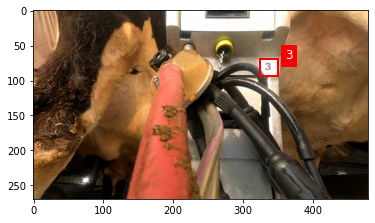

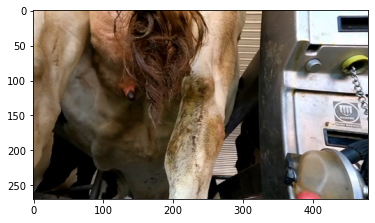

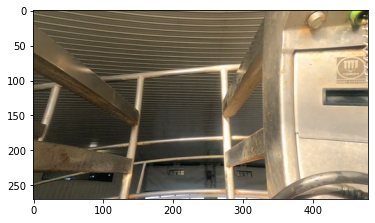

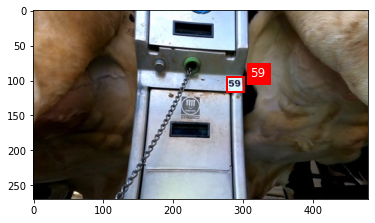

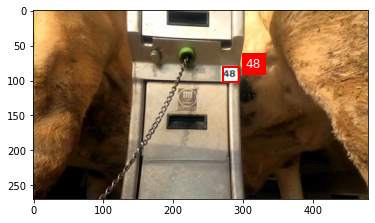

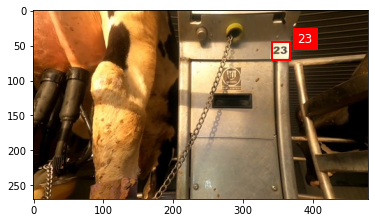

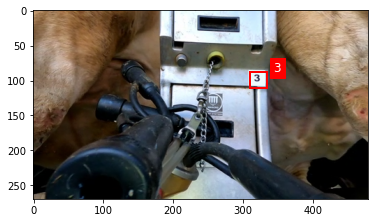

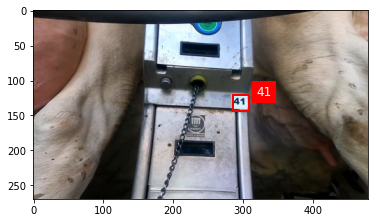

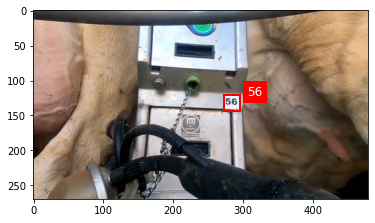

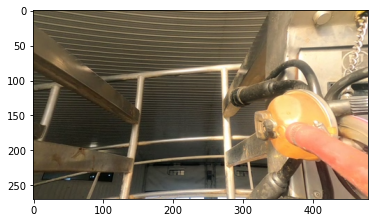

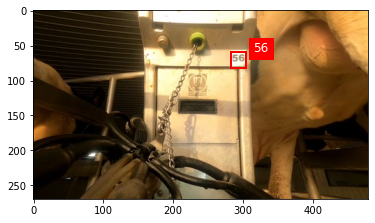

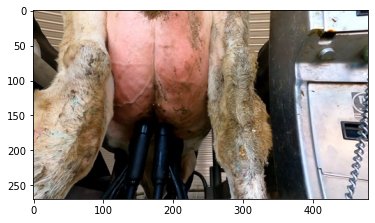

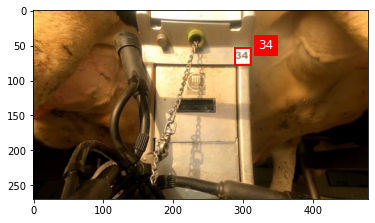

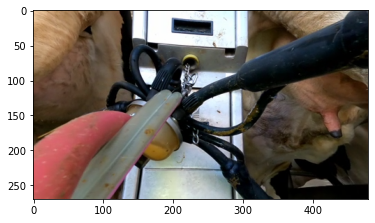

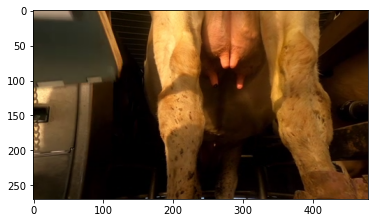

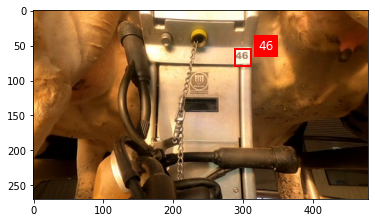

In [83]:
load_image_and_boxes(1, train_loader)

In [84]:
next(iter(val_loader))

(tensor([[[[0.2745, 0.2745, 0.2745,  ..., 0.9020, 0.9255, 0.9451],
           [0.2706, 0.2706, 0.2706,  ..., 0.9098, 0.9373, 0.9529],
           [0.2627, 0.2627, 0.2627,  ..., 0.9373, 0.9451, 0.9412],
           ...,
           [0.0510, 0.0667, 0.0706,  ..., 0.0000, 0.0000, 0.0000],
           [0.0824, 0.0824, 0.0824,  ..., 0.0000, 0.0000, 0.0000],
           [0.1137, 0.1137, 0.1137,  ..., 0.0000, 0.0000, 0.0000]],
 
          [[0.2706, 0.2706, 0.2706,  ..., 0.8078, 0.8275, 0.8471],
           [0.2667, 0.2667, 0.2667,  ..., 0.8118, 0.8392, 0.8549],
           [0.2627, 0.2627, 0.2627,  ..., 0.8392, 0.8471, 0.8431],
           ...,
           [0.0235, 0.0431, 0.0471,  ..., 0.0000, 0.0000, 0.0039],
           [0.0431, 0.0431, 0.0431,  ..., 0.0000, 0.0039, 0.0039],
           [0.0706, 0.0706, 0.0706,  ..., 0.0000, 0.0039, 0.0039]],
 
          [[0.2902, 0.2902, 0.2902,  ..., 0.6824, 0.7059, 0.7294],
           [0.2863, 0.2863, 0.2863,  ..., 0.6863, 0.7176, 0.7373],
           [0.2824, 0.28

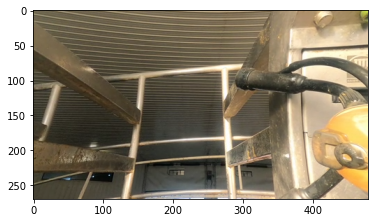

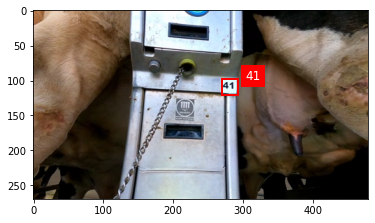

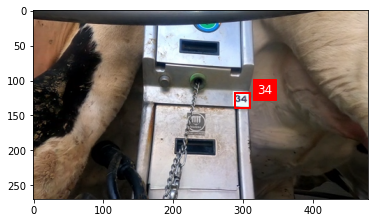

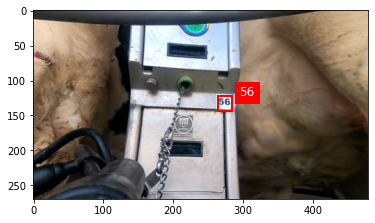

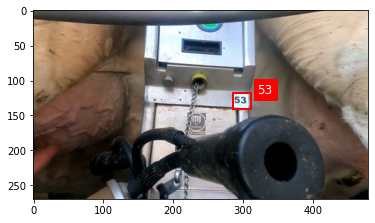

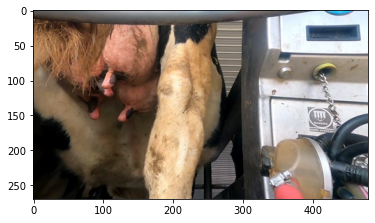

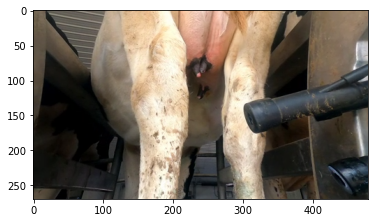

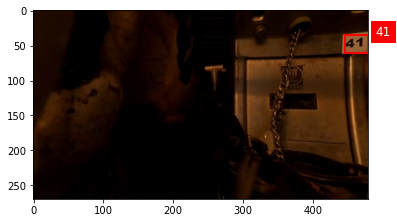

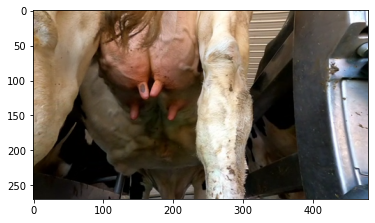

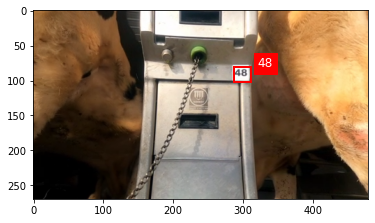

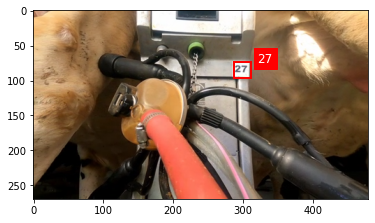

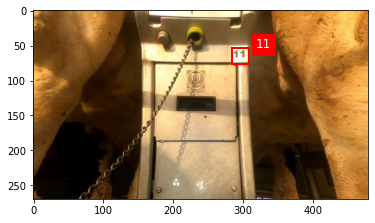

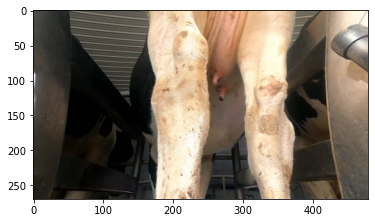

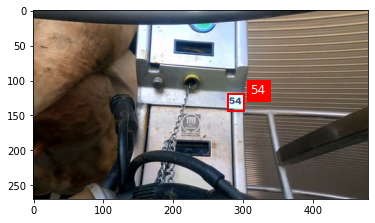

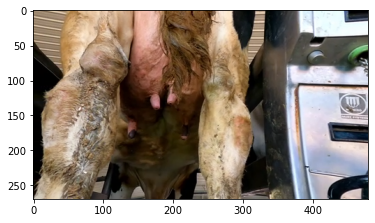

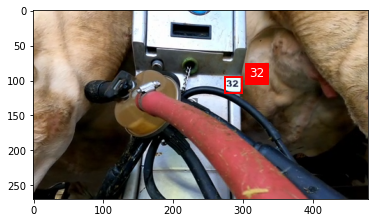

In [85]:
#load the validation data
load_image_and_boxes(1, val_loader)

In [86]:
next(iter(test_loader))

(tensor([[[[0.1569, 0.1569, 0.1569,  ..., 0.8431, 0.8314, 0.8627],
           [0.1490, 0.1490, 0.1490,  ..., 0.8510, 0.8706, 0.8784],
           [0.1373, 0.1373, 0.1373,  ..., 0.8667, 0.8588, 0.8627],
           ...,
           [0.3843, 0.3804, 0.3765,  ..., 0.8235, 0.7961, 0.8078],
           [0.3647, 0.3686, 0.3804,  ..., 0.7922, 0.7882, 0.7882],
           [0.3647, 0.3686, 0.3843,  ..., 0.7961, 0.8157, 0.8235]],
 
          [[0.1529, 0.1529, 0.1529,  ..., 0.7059, 0.6980, 0.7294],
           [0.1490, 0.1490, 0.1490,  ..., 0.7098, 0.7333, 0.7412],
           [0.1373, 0.1373, 0.1373,  ..., 0.7294, 0.7176, 0.7255],
           ...,
           [0.2902, 0.2863, 0.2824,  ..., 0.7529, 0.7294, 0.7373],
           [0.2784, 0.2824, 0.2980,  ..., 0.7216, 0.7176, 0.7176],
           [0.2863, 0.2902, 0.3020,  ..., 0.7294, 0.7451, 0.7529]],
 
          [[0.1647, 0.1647, 0.1647,  ..., 0.6392, 0.6314, 0.6667],
           [0.1569, 0.1569, 0.1569,  ..., 0.6431, 0.6667, 0.6784],
           [0.1373, 0.13

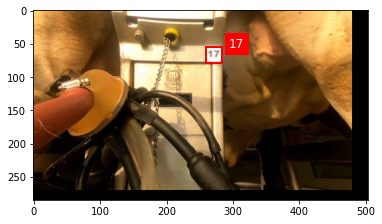

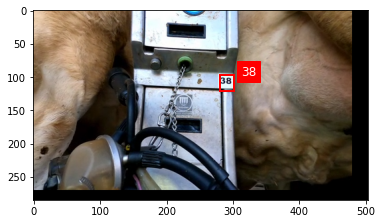

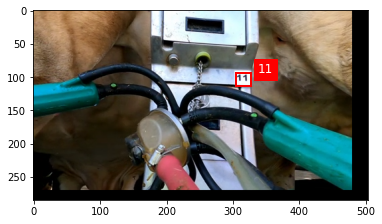

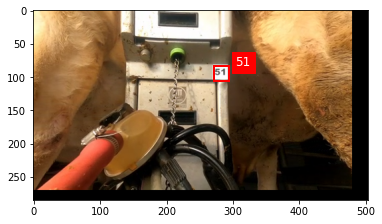

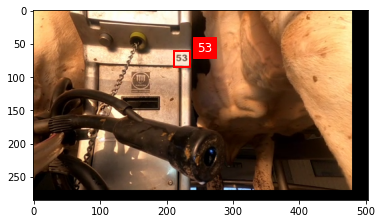

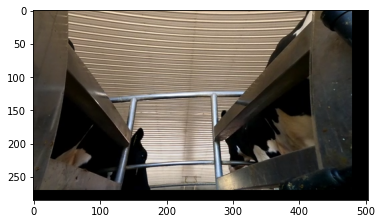

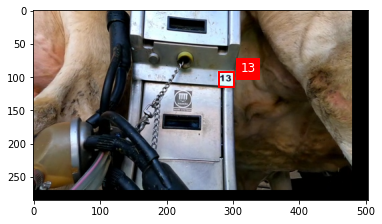

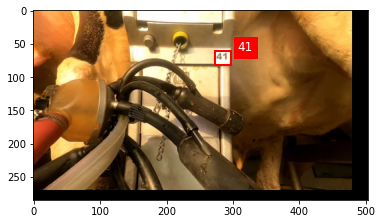

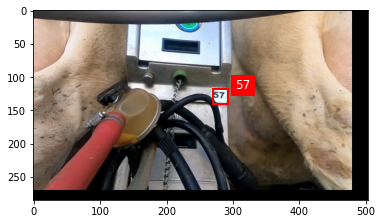

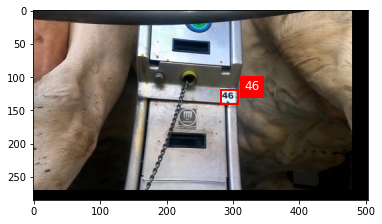

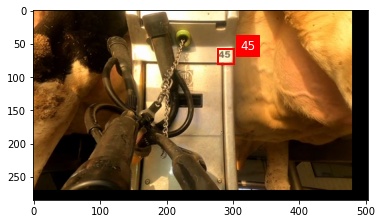

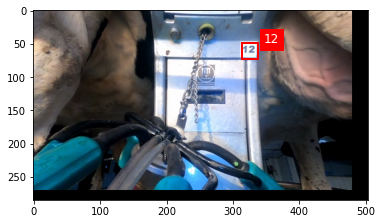

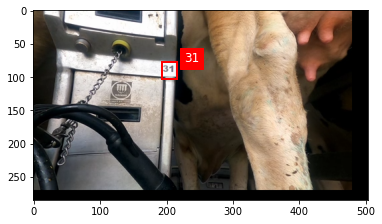

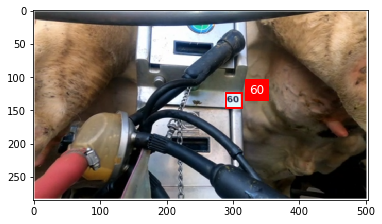

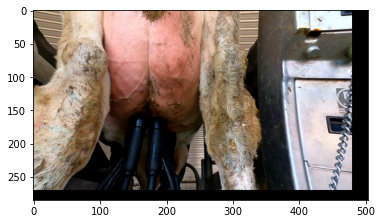

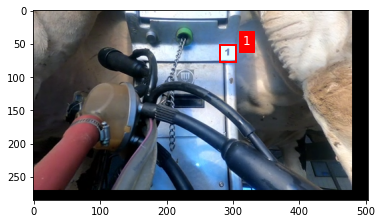

In [87]:
#load the test data
load_image_and_boxes(1, test_loader)

# 2. Train your model using [cow stall number datas](https://github.com/YoushanZhang/Cow_stall_number)

1.set pretain model and optimizer
2.set hyperprameter
3.train, validation and save model
4.load model
5.run test file and save results
6.show results image
7.write research paper 

1.set pretain model and optimizer


In [88]:
import torchvision
from torchvision.models.detection import FasterRCNN
from torchvision.models.detection.rpn import AnchorGenerator
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor

model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

num_classes = 61 
in_features = model.roi_heads.box_predictor.cls_score.in_features

model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)


2.set hyperprameter


In [89]:
import torch

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

model.to(device)

params = [p for p in model.parameters() if p.requires_grad]

#optimizer = torch.optim.SGD(params, lr=0.001, momentum=0.9,weight_decay=0.0005)
optimizer = torch.optim.Adam(params, lr=0.0001, weight_decay=0.0005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.1)


In [90]:
def load_pretrain_frcnn_model(filename):
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True)

    num_classes = 61 
    in_features = model.roi_heads.box_predictor.cls_score.in_features

    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes)
    model.load_state_dict(torch.load(filename))
    return model.to(device)

In [91]:
def iou(box1, box2):

    x1, y1, x2, y2 = box1
    x1_p, y1_p, x2_p, y2_p = box2


    xi1 = max(x1, x1_p)
    yi1 = max(y1, y1_p)
    xi2 = min(x2, x2_p)
    yi2 = min(y2, y2_p)


    inter_area = max(xi2 - xi1, 0) * max(yi2 - yi1, 0)


    box1_area = (x2 - x1) * (y2 - y1)
    box2_area = (x2_p - x1_p) * (y2_p - y1_p)


    union_area = box1_area + box2_area - inter_area
    iou = inter_area / union_area

    return iou

In [92]:
def train_epoch(epoch_index):
    model.train()
    running_loss = 0.0
    for images, targets, _ in train_loader:
        images = [image.to(device) for image in images]
        targets = [{k: v.to(device) for k, v in t.items()} for t in targets]

        optimizer.zero_grad()

        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())

        losses.backward()
        optimizer.step()

        running_loss += losses.item()

    return running_loss / len(train_loader)

In [93]:
def validate():
    model.eval()
    total = 0
    correct = 0
    iou_threshold = 0.5  

    with torch.no_grad():
        for images, targets, _ in val_loader:
            images = list(image.to(device) for image in images)
            outputs = model(images)

            for i in range(len(images)):
                
                pred_boxes = outputs[i]['boxes']
                pred_labels = outputs[i]['labels']
                target_boxes = targets[i]['boxes']

                # box iou calculation
                if len(pred_boxes) > 0 and len(target_boxes) > 0:
                    pred_box = pred_boxes[0].cpu().numpy() 
                    target_box = target_boxes[0].cpu().numpy()

                    if iou(pred_box, target_box) >= iou_threshold:
                        correct += 1

                total += 1

    accuracy = correct / total
    return accuracy

In [94]:
def train_frcnn(num_epochs):
    train_losses = []
    val_accuracies = []

    for epoch in range(num_epochs):
        train_loss = train_epoch(epoch)
        val_accuracy = validate()
        lr_scheduler.step()
        train_losses.append(train_loss)
        val_accuracies.append(val_accuracy)
        print(f'Epoch {epoch}, Train Loss: {train_loss}, Validation IOU: {val_accuracy}')


    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(train_losses, label='Train Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss')

    plt.subplot(1, 2, 2)
    plt.plot(val_accuracies, label='Validation IOU')
    plt.xlabel('Epochs')
    plt.ylabel('IOU Accuracy')
    plt.title('Validation IOU')

    plt.show()

Epoch 0, Train Loss: 0.14389738041375363, Validation IOU: 0.7070063694267515


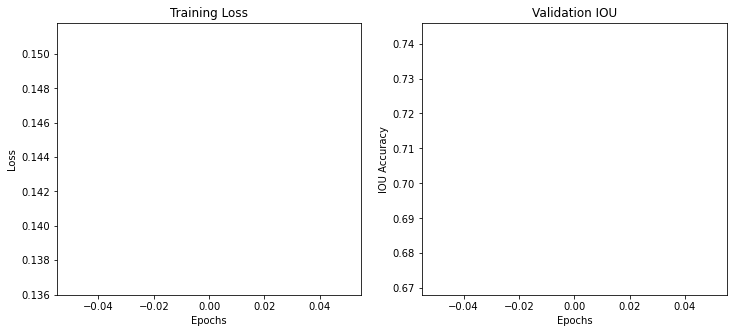

In [95]:
# train the model
num_epochs=1
download_model='faster_rcnn.pth'
model=load_pretrain_frcnn_model(download_model)
train_frcnn(num_epochs)
torch.save(model.state_dict(), download_model)

Epoch 0, Train Loss: 0.4032799058726856, Validation Accuracy: 0.0
Epoch 1, Train Loss: 0.4043357569192137, Validation Accuracy: 0.0
Epoch 2, Train Loss: 0.4041303587811334, Validation Accuracy: 0.0
Epoch 3, Train Loss: 0.40403364173003603, Validation Accuracy: 0.0


3.train, validation and save model and generate the loss and accuracy plot.



4.load model


In [96]:
model=load_pretrain_frcnn_model(download_model)

# 3.Evaluate your model using the test images


5.run test file and save results


In [97]:
test_dataset[3]

(tensor([[[0.8784, 0.9020, 0.9098,  ..., 0.6039, 0.5882, 0.6118],
          [0.9020, 0.9137, 0.9255,  ..., 0.6157, 0.6078, 0.6078],
          [0.9373, 0.9373, 0.9569,  ..., 0.6078, 0.6078, 0.5961],
          ...,
          [0.4784, 0.4824, 0.4667,  ..., 0.0118, 0.0118, 0.0157],
          [0.5255, 0.4745, 0.4784,  ..., 0.0078, 0.0118, 0.0118],
          [0.4941, 0.4588, 0.4941,  ..., 0.0078, 0.0118, 0.0118]],
 
         [[0.8235, 0.8431, 0.8549,  ..., 0.4980, 0.4863, 0.5059],
          [0.8431, 0.8588, 0.8667,  ..., 0.5137, 0.5020, 0.5020],
          [0.8824, 0.8824, 0.8980,  ..., 0.5098, 0.5020, 0.4902],
          ...,
          [0.4235, 0.4275, 0.4078,  ..., 0.0039, 0.0039, 0.0078],
          [0.4706, 0.4196, 0.4235,  ..., 0.0000, 0.0039, 0.0039],
          [0.4392, 0.4078, 0.4392,  ..., 0.0000, 0.0039, 0.0039]],
 
         [[0.7882, 0.8118, 0.8196,  ..., 0.3725, 0.3608, 0.3804],
          [0.8118, 0.8235, 0.8353,  ..., 0.3882, 0.3765, 0.3765],
          [0.8471, 0.8471, 0.8667,  ...,

In [98]:
y_true =[]
y_pred = []

for i in range(len(test_dataset)):
    #return image, target and filename in Groud truth
    img,target,_ = test_dataset[i]

    model.eval()
    model.to(device)
    with torch.no_grad():
        prediction = model([img.to(device)])[0]

        default_value = 0
        
        # Check if 'labels' is not empty
        if len(target['labels']) > 0:
            # Ground truth
            y_true.append(target['labels'][0])
        else:
            # Handle the case where 'labels' is empty
            # You might want to append a default value or take some other action
            y_true.append(default_value)  # Replace 'default_value' with whatever is appropriate for your case
        
        # Check if 'labels' in prediction is not empty before appending to y_pred
        if len(prediction['labels']) > 0:
            y_pred.append(prediction['labels'][0])
        else:
            y_pred.append(default_value)  # Handle the case where prediction['labels'] is empty


In [100]:
yy_pred = []
for v in y_pred:
    # Check if 'v' is a tensor before calling .cpu()
    if torch.is_tensor(v):
        yy_pred.append(v.cpu())
    else:
        yy_pred.append(v)  # Directly append if 'v' is not a tensor
yy_pred

[tensor(1),
 tensor(28),
 0,
 tensor(2),
 0,
 tensor(1),
 tensor(28),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(28),
 0,
 tensor(28),
 tensor(1),
 tensor(28),
 0,
 0,
 0,
 tensor(1),
 tensor(1),
 tensor(28),
 0,
 tensor(1),
 0,
 0,
 tensor(28),
 tensor(2),
 0,
 tensor(1),
 tensor(1),
 0,
 tensor(28),
 0,
 tensor(1),
 tensor(2),
 0,
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(28),
 tensor(1),
 tensor(1),
 0,
 0,
 0,
 0,
 tensor(28),
 tensor(1),
 tensor(1),
 tensor(1),
 0,
 0,
 tensor(28),
 0,
 tensor(1),
 0,
 tensor(1),
 0,
 tensor(28),
 tensor(2),
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(1),
 0,
 tensor(1),
 tensor(1),
 tensor(1),
 tensor(28),
 tensor(1),
 0,
 tensor(1),
 tensor(1),
 0,
 tensor(28),
 tensor(1),
 tensor(1),
 0,
 tensor(28),
 tensor(1),
 tensor(1),
 tensor(1),
 0,
 0,
 tensor(1),
 0,
 tensor(2),
 tensor(28),
 tensor(28),
 tensor(28),
 tensor(1),
 tensor(1),
 0,
 tensor(1),
 tensor(28),
 tensor(1),
 tensor(1),
 tensor(1),
 0,
 0,
 tensor(28),


In [101]:
#confusion_matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true, yy_pred)

array([[42,  1,  0, ...,  0,  0,  0],
       [ 0,  4,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0],
       ...,
       [ 1,  0,  1, ...,  0,  0,  0],
       [ 1,  1,  0, ...,  0,  0,  0],
       [ 0,  1,  0, ...,  0,  0,  0]])

In [102]:
from sklearn.metrics import classification_report
print(classification_report(y_true, yy_pred))

              precision    recall  f1-score   support

           0       0.55      0.98      0.71        43
           1       0.03      1.00      0.06         4
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         5
           6       0.00      0.00      0.00         4
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         2
           9       0.00      0.00      0.00         6
          10       0.00      0.00      0.00         5
          11       0.00      0.00      0.00         5
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00         4
          15       0.00      0.00      0.00         4
          16       0.00      0.00      0.00         6
          17       0.00    

/home/xin/miniconda3/envs/pytorch_nn/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


6.show results image
7.write research paper 

# 4. Your results should be higher than 80%.

# 5. Write a four-page report using LaTex and upload your paper to ResearchGate or Arxiv, and put your paper link here.


# 6. Grading rubric

(1). Code ------- 20 points (you also need to upload your final model as a pt file, and add paper link)

(2). Grammer ---- 20 points

(3). Introduction & related work --- 10 points

(4). Method  ---- 20 points

(5). Results ---- 20 points

(6). Discussion - 10 points